Importing the libraries

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


Importing the open source online retail dataset

In [2]:
df=pd.read_csv("/Users/vidushigupta/Desktop/Vidushi/Retail/retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


Checking the countries for which the dataset is available

In [3]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Choosing to analyse the customer segmentation for the Switzerland

Extracting the data for Switzerland from the main dataset

In [4]:
df_swiss=df.loc[df['Country'] == 'Switzerland']
df_swiss.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5320,536858,22326,ROUND SNACK BOXES SET OF4 WOODLAND,30,12/3/10 10:36,2.95,13520.0,Switzerland
5321,536858,22554,PLASTERS IN TIN WOODLAND ANIMALS,36,12/3/10 10:36,1.65,13520.0,Switzerland
5322,536858,21731,RED TOADSTOOL LED NIGHT LIGHT,24,12/3/10 10:36,1.65,13520.0,Switzerland
5323,536858,20677,PINK POLKADOT BOWL,16,12/3/10 10:36,1.25,13520.0,Switzerland
5324,536858,20750,RED RETROSPOT MINI CASES,2,12/3/10 10:36,7.95,13520.0,Switzerland


Converting Invoice Dates to date time format and making a new column named Amount which tells the total money spent on that invoice

In [5]:
df_swiss['InvoiceDate']= pd.to_datetime(df_swiss['InvoiceDate'],errors='coerce') 
df_swiss["Amount"] = df_swiss["Quantity"] * df_swiss["UnitPrice"]
df_swiss.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
5320,536858,22326,ROUND SNACK BOXES SET OF4 WOODLAND,30,2010-12-03 10:36:00,2.95,13520.0,Switzerland,88.5
5321,536858,22554,PLASTERS IN TIN WOODLAND ANIMALS,36,2010-12-03 10:36:00,1.65,13520.0,Switzerland,59.4
5322,536858,21731,RED TOADSTOOL LED NIGHT LIGHT,24,2010-12-03 10:36:00,1.65,13520.0,Switzerland,39.6
5323,536858,20677,PINK POLKADOT BOWL,16,2010-12-03 10:36:00,1.25,13520.0,Switzerland,20.0
5324,536858,20750,RED RETROSPOT MINI CASES,2,2010-12-03 10:36:00,7.95,13520.0,Switzerland,15.9


Checking the start and end date of the Switzerland dataframe

In [6]:
print('Min{};Max{}'.format(min(df_swiss.InvoiceDate),max(df_swiss.InvoiceDate)))

Min2010-12-03 10:36:00;Max2011-11-29 08:40:00


Creating a Snapshot date which would count the number of days since the Invoice date to a hypothetical date for analysis of the particular customer and add 1 to it so that the initial date is not 0. This would calculate the "Recency"

In [7]:
snapshot_date=max(df_swiss.InvoiceDate)+ datetime.timedelta(days=1)
snapshot_date

Timestamp('2011-11-30 08:40:00')

## RFM ANALYSIS

Making a new dataframe which depicts the Recency. This is a measure that shows the number of days passed since the last purchase.

In [8]:
recency_df = df_swiss.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (snapshot_date - x).days)
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df.head()

,CustomerID,Recency
0,12357.0,23
1,12371.0,34
2,12377.0,305
3,12378.0,119
4,12384.0,19


Making a new dataframe which depicts the Frequency. This is a measure of the number of purchases

In [9]:
frequency_df = df_swiss.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12357.0,131
1,12371.0,63
2,12377.0,77
3,12378.0,219
4,12384.0,30


Making a new dataframe named Monetary which depicts the total monetary value spent by the customer.

In [10]:
monetary_df = df_swiss.groupby(by='CustomerID',as_index=False).agg([('Amount','sum')])
monetary_df=monetary_df[['Amount']]
monetary_df.head()

,Amount
,Amount
CustomerID,
12357.0,6207.67
12371.0,1887.96
12377.0,1628.12
12378.0,4008.62
12384.0,566.16


Merging the three dataframes

In [11]:
temp_df = recency_df.merge(frequency_df,on='CustomerID')
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.rename(columns = {'Recency': 'Recency','Frequency': 'Frequency',('Amount', 'Amount'): 'Monetary'}, inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12357.0,23,131,6207.67
12371.0,34,63,1887.96
12377.0,305,77,1628.12
12378.0,119,219,4008.62
12384.0,19,30,566.16


Checking how skewed the data is

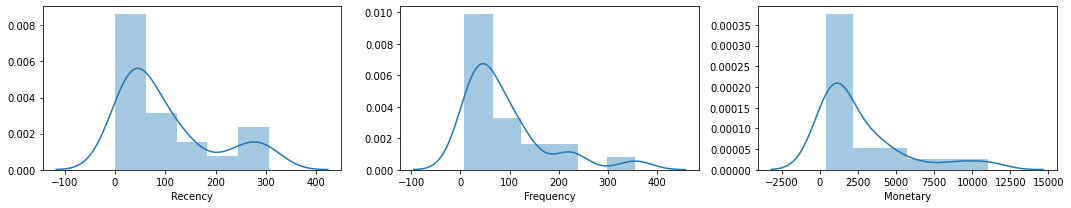

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(rfm_df['Recency'], ax=ax[0])
sns.distplot(rfm_df['Frequency'], ax=ax[1])
sns.distplot(rfm_df['Monetary'], ax=ax[2])
plt.tight_layout()
plt.show()

To manage the skewedness we would divide them in quantiles 

In [13]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,34.0,34.0,681.08
0.50,61.0,63.0,1628.12
0.75,126.0,114.0,3487.75


Converting it to dict format for easy use

In [14]:
quantiles.to_dict()


{'Recency': {0.25: 34.0, 0.5: 61.0, 0.75: 126.0},
 'Frequency': {0.25: 34.0, 0.5: 63.0, 0.75: 114.0},
 'Monetary': {0.25: 681.0799999999999,
  0.5: 1628.1199999999997,
  0.75: 3487.749999999999}}

Assigning the values to the quantiles for easy analysis and same scale
(x = value, p = recency, monetary_value, frequency, d = quartiles dict)

In [15]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

Assigning the quartile value

In [16]:
rfm_segment = rfm_df
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12357.0,23,131,6207.67,4,4,4
12371.0,34,63,1887.96,4,2,3
12377.0,305,77,1628.12,1,3,2
12378.0,119,219,4008.62,2,4,4
12384.0,19,30,566.16,4,1,1


Defining the RFM segment as the R, F and M quartile values put together. Defining the RFM score as the sum of the quartile values

In [17]:
rfm_segment['RFM_segment'] = rfm_segment.R_Quartile.map(str) \
                            + rfm_segment.F_Quartile.map(str) \
                            + rfm_segment.M_Quartile.map(str)
rfm_segment['RFM_score']=rfm_segment[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segment,RFM_score
CustomerID,,,,,,,,
12357.0,23,131,6207.67,4,4,4,444,12
12371.0,34,63,1887.96,4,2,3,423,9
12377.0,305,77,1628.12,1,3,2,132,6
12378.0,119,219,4008.62,2,4,4,244,10
12384.0,19,30,566.16,4,1,1,411,6


Dividing the customers into categories based on their RFM scores

In [18]:
def rfm_level(df):
    if df['RFM_score'] >= 9:
        return 'Best Customers'
    elif ((df['RFM_score'] >= 7) and (df['RFM_score'] < 9)):
        return 'Loyal Customers'
    elif ((df['RFM_score'] >= 5) and (df['RFM_score'] < 7)):
        return 'Promising Customers'
    elif ((df['RFM_score'] >= 4) and (df['RFM_score'] < 5)):
        return 'Need attention'
    else:
        return 'Get better deals for them'
rfm_segment['Customer_type'] = rfm_segment.apply(rfm_level, axis=1)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segment,RFM_score,Customer_type
CustomerID,,,,,,,,,
12357.0,23,131,6207.67,4,4,4,444,12,Best Customers
12371.0,34,63,1887.96,4,2,3,423,9,Best Customers
12377.0,305,77,1628.12,1,3,2,132,6,Promising Customers
12378.0,119,219,4008.62,2,4,4,244,10,Best Customers
12384.0,19,30,566.16,4,1,1,411,6,Promising Customers


Calculating the average values for each RFM_Level and returning the size of each segment 


In [19]:
rfm_level_agg = rfm_segment.groupby('Customer_type').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
rfm_level_agg

Recency Frequency Monetary      
                             mean      mean     mean count
Customer_type                                             
Best Customers               46.7     148.3   4637.6    10
Get better deals for them   238.0      18.0    572.4     3
Loyal Customers              61.0      38.0    947.4     1
Need attention              102.0      34.0    668.6     1
Promising Customers         128.7      44.7   1005.0     6

In [20]:
df_rfm=rfm_level_agg.reset_index()
df_rfm.head()

Customer_type Recency Frequency Monetary      
                                mean      mean     mean count
0             Best Customers    46.7     148.3   4637.6    10
1  Get better deals for them   238.0      18.0    572.4     3
2            Loyal Customers    61.0      38.0    947.4     1
3             Need attention   102.0      34.0    668.6     1
4        Promising Customers   128.7      44.7   1005.0     6

In [21]:
df_rfm = df_rfm.set_axis(['Customer_type', 'RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count'], axis=1, inplace=False)
df_rfm

,Customer_type,RecencyMean,FrequencyMean,MonetaryMean,Count
0,Best Customers,46.7,148.3,4637.6,10
1,Get better deals for them,238.0,18.0,572.4,3
2,Loyal Customers,61.0,38.0,947.4,1
3,Need attention,102.0,34.0,668.6,1
4,Promising Customers,128.7,44.7,1005.0,6


In [22]:
df_rfm.columns

Index(['Customer_type', 'RecencyMean', 'FrequencyMean', 'MonetaryMean',
       'Count'],
      dtype='object')

In [23]:
labels = df_rfm['Customer_type']
values = df_rfm['RecencyMean']
colors = ['#FF3333', '#0099FF', '#FF9900', '#F2DB00','#00CC66']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1, 0, 0,0])])
fig.update_traces( title="Recency among customers",hoverinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='white', width=1.5)))

fig.update_layout(autosize=False,width=450,height=350,margin=dict(l=10,r=10,b=10,t=10,pad=4),
   )
fig.show()

In [24]:
labels = df_rfm['Customer_type']
values = df_rfm['FrequencyMean']
colors = ['#0099FF', '#FF3333', '#F2DB00', '#FF9900','#00CC66']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0, 0, 0,0])])
fig.update_traces( title="Frequency among customers",hoverinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='white', width=1.5)))
fig.update_layout(autosize=False,width=450,height=350,margin=dict(l=10,r=10,b=10,t=10,pad=4),
   )
fig.show()

In [25]:
labels = df_rfm['Customer_type']
values = df_rfm['MonetaryMean']
colors = ['#0099FF', '#FF3333', '#F2DB00', '#FF9900','#00CC66']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0, 0, 0,0])])
fig.update_traces( title="Monetary Value",hoverinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='white', width=1.5)))
fig.update_layout(autosize=False,width=450,height=350,margin=dict(l=10,r=10,b=10,t=10,pad=4),
   )
fig.show()